In [8]:
import csv

results = dict()

with open('anon_alldata_so_far.csv', 'r') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        if row['TimeseriesName'] not in results:
            results[row['TimeseriesName']] = (0, 0)
        valid, total = results[row['TimeseriesName']]
        if row['Nyquist'] == '-1':
            results[row['TimeseriesName']] = (valid, total + 1)
        else:
            results[row['TimeseriesName']] = (valid + 1, total + 1)

print(results)

{'mcBytesDropped': (3, 55), 'mcBytes': (10, 51), 'ifOutDiscards': (0, 3), 'ifInDiscards': (60, 66), 'Utilization_Percentage': (205, 210), 'Temperature': (240, 240), 'cpu5Sec': (120, 121), 'usedMemory': (114, 120), 'Max_OutGBps': (200, 210), 'Max_InGBps': (87, 90), 'errorrate': (289, 289), 'LossyPaths': (93, 94), 'ucBytes': (15, 24), 'ucBytesDropped': (0, 40)}


In [37]:
x = []
y = []
descriptions = {
    'ifOutDiscards' : 'Out-bound discards',
    'ucBytesDropped' : 'Unicast drops',
    'mcBytesDropped' : 'Multicast drops',
    'mcBytes' : 'Multicast bytes',
    'ucBytes' : 'Unicast bytes',
    'ifInDiscards' : 'In-bound discards',
    'usedMemory' : 'Memory usage',
    'Max_OutGBps' : 'Peak egress BW',
    'Max_InGBps' : 'Peak ingress BW',
    'Utilization_Percentage' : 'Link util',
    'LossyPaths' : 'Lossy Paths',
    'cpu5Sec' : '5-pct CPU util',
    'Temperature' : 'Temperature',
    'errorrate' : 'FCS errors'}

for k, v in results.items():
    x.append(descriptions[k])
    y.append(v[0]/v[1])

zipped_lists = zip(y, x)
sorted_pairs = sorted(zipped_lists)

tuples = zip(*sorted_pairs)
y, x = [ list(tuple) for tuple in  tuples]

print(x)
print(y)

['Out-bound discards', 'Unicast drops', 'Multicast drops', 'Multicast bytes', 'Unicast bytes', 'In-bound discards', 'Memory usage', 'Peak egress BW', 'Peak ingress BW', 'Link util', 'temp', '5-pct CPU util', 'FCS errors', 'Temperature']
[0.0, 0.0, 0.05454545454545454, 0.19607843137254902, 0.625, 0.9090909090909091, 0.95, 0.9523809523809523, 0.9666666666666667, 0.9761904761904762, 0.9893617021276596, 0.9917355371900827, 1.0, 1.0]


<ipython-input-38-deec3e05e416>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x, rotation=45, ha='right', Fontsize=7)
<ipython-input-38-deec3e05e416>:6: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.set_xticklabels(x, rotation=45, ha='right', Fontsize=7)
<ipython-input-38-deec3e05e416>:10: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


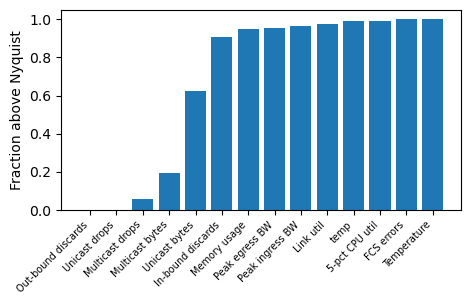

In [38]:
import matplotlib.pyplot as plt

fig = plt.figure()
fig.set_size_inches(4, 2)
ax = fig.add_axes([0,0,1,1])
ax.set_xticklabels(x, rotation=45, ha='right', Fontsize=7)
ax.set_ylabel('Fraction above Nyquist')
ax.bar(x,y)

plt.tight_layout()
plt.savefig('intro.png', bbox_inches='tight')
plt.show()